In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams["font.size"] = 13

In [2]:
root_dir = '/Users/zcaspar/codes/mit4320/'
fig_dir = '/Users/zcaspar/Documents/Figures_manuscript/'

In [29]:
ds = xr.open_dataset(root_dir+'energy_binned_dl1.0.nc')
dsL = xr.open_dataset(root_dir+'Lcov_SSU_dl2.nc').rename({'lon_bins':'lon_bin','lat_bins':'lat_bin'})
dsE = xr.open_dataset(root_dir+'Ecov_SSU_dl2.nc').rename({'lon_bins':'lon_bin','lat_bins':'lat_bin'})

In [18]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
def plot_maps(ds,colmap='RdBu_r',vlim=(-0.01,0.01),axes=111,**kwargs):
    crs = ccrs.Robinson()
    #fig = plt.figure(figsize=figsize)
    cbar_kwargs = {'fraction':0.02}
    cbar_kwargs.update(**kwargs)
    ax = fig.add_subplot(axes,projection=crs)
    ds.plot(vmax=vlim[1],vmin=vlim[0],y='lat_bin',ax=ax,
            transform=ccrs.PlateCarree(),cmap=colmap,label=False,#**kwargs,
            cbar_kwargs=cbar_kwargs) #{'fraction':0.02,'label':'energy'}
    ax.gridlines(draw_labels=True)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.LAND)
    return fig,ax

### Lagrangian

Mean data points :  <xarray.DataArray 'L_count' ()>
array(14103.91852922)


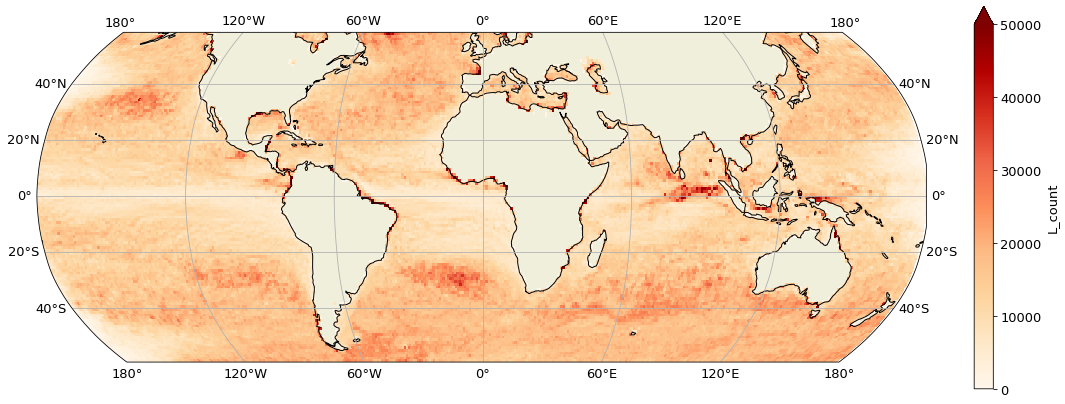

In [65]:
fig = plt.figure(figsize=(15,6))
fig,axs = plot_maps(ds.L_count.where(ds.L_count>0),colmap='OrRd',vlim=(0,50000))
fig.tight_layout()
print('Mean data points : ', ds.L_count.where(ds.L_count>0).mean())

(array([3.210e+02, 2.720e+02, 2.660e+02, 3.520e+02, 5.700e+02, 7.850e+02,
        1.072e+03, 1.426e+03, 1.693e+03, 1.850e+03, 1.886e+03, 1.970e+03,
        2.049e+03, 1.980e+03, 2.121e+03, 2.178e+03, 2.392e+03, 2.181e+03,
        2.001e+03, 1.513e+03, 1.045e+03, 7.890e+02, 5.110e+02, 3.810e+02,
        2.460e+02, 1.690e+02, 9.800e+01, 6.500e+01, 4.100e+01, 3.400e+01,
        2.900e+01, 2.300e+01, 1.900e+01, 2.400e+01, 1.200e+01, 1.400e+01,
        1.700e+01, 1.500e+01, 1.500e+01, 1.100e+01, 1.200e+01, 6.000e+00,
        4.000e+00, 2.000e+00, 3.000e+00, 6.000e+00, 3.000e+00, 6.000e+00,
        2.000e+00]),
 array([    0.        ,  1020.40816327,  2040.81632653,  3061.2244898 ,
         4081.63265306,  5102.04081633,  6122.44897959,  7142.85714286,
         8163.26530612,  9183.67346939, 10204.08163265, 11224.48979592,
        12244.89795918, 13265.30612245, 14285.71428571, 15306.12244898,
        16326.53061224, 17346.93877551, 18367.34693878, 19387.75510204,
        20408.16326531, 214

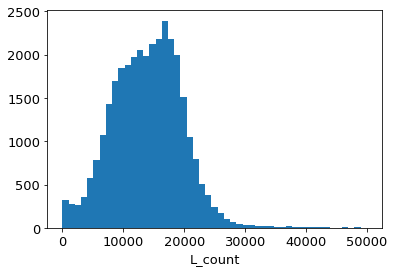

In [69]:
ds.L_count.where(ds.L_count>0).plot.hist(bins=np.linspace(0,50000))

Mean data points :  <xarray.DataArray 'count' ()>
array(15.03140256)


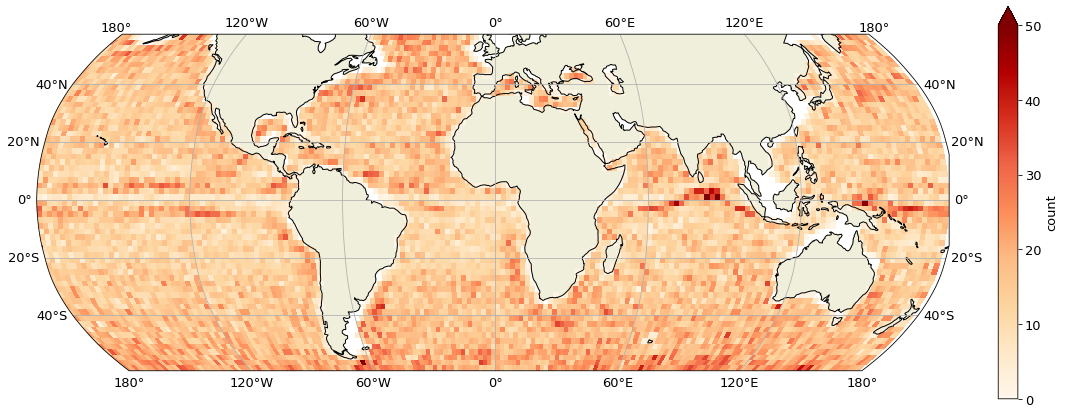

In [64]:
fig = plt.figure(figsize=(15,6))
fig,axs = plot_maps(dsL["count"].where(dsL["count"]>0),colmap='OrRd',vlim=(0,50))
fig.tight_layout()
print('Mean data points : ', dsL["count"].where(dsL["count"]>0).mean())

(array([6.340e+02, 1.593e+03, 2.922e+03, 1.551e+03, 6.220e+02, 2.110e+02,
        3.200e+01, 9.000e+00, 2.000e+00, 3.000e+00]),
 array([ 1. ,  6.4, 11.8, 17.2, 22.6, 28. , 33.4, 38.8, 44.2, 49.6, 55. ]),
 <BarContainer object of 10 artists>)

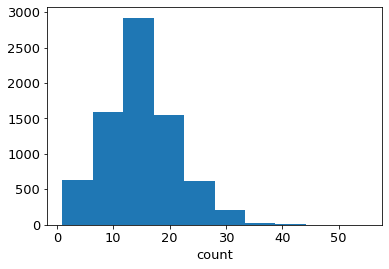

In [63]:
dsL["count"].where(dsL["count"]>0).plot.hist()

### Eulerian

Mean data points :  <xarray.DataArray 'E_count' ()>
array(1669373.14763231)


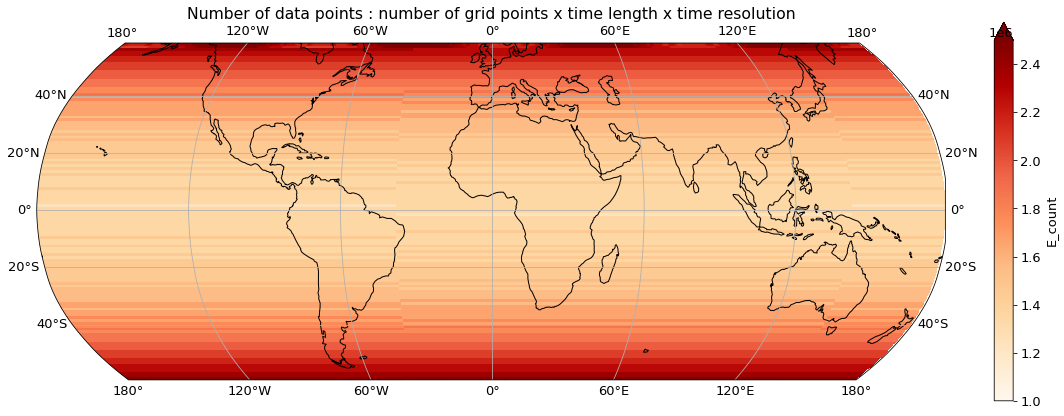

In [54]:
fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps(ds.E_count*360*24,colmap='OrRd',vlim=(1.e6,2.5e6))
ax.set_title(r'Number of data points : number of grid points x time length x time resolution')
fig.tight_layout()
print('Mean data points : ', (ds.E_count*360*24).mean())

(array([10052.,  8616.,  8975.,  2513.,  5026.,  2191.,  3704.,  1009.,
          547.,    88.]),
 array([1244160., 1397088., 1550016., 1702944., 1855872., 2008800.,
        2161728., 2314656., 2467584., 2620512., 2773440.]),
 <BarContainer object of 10 artists>)

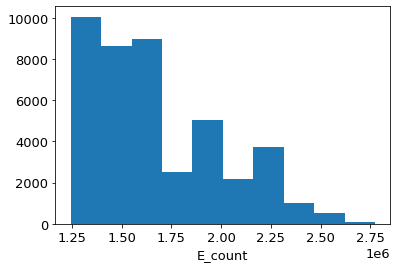

In [62]:
(ds.E_count*360*24).plot.hist()

Mean data points :  <xarray.DataArray 'count' ()>
array(769.95795853)


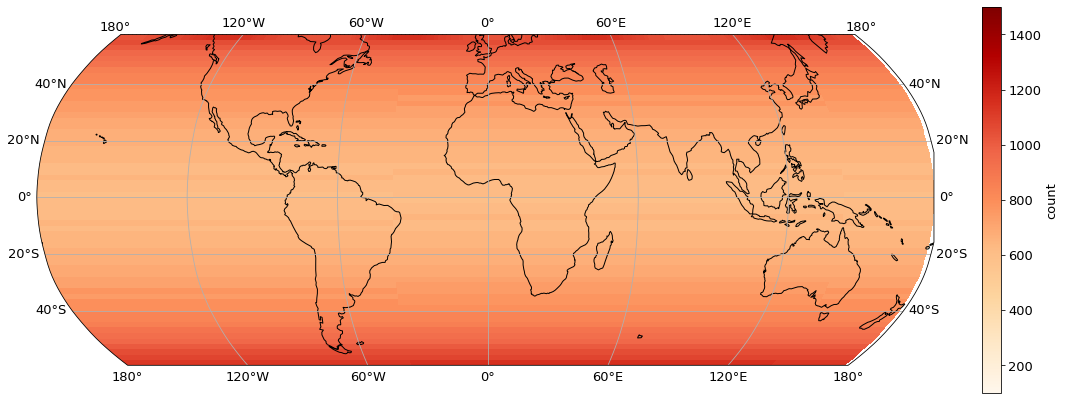

In [70]:
fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps(dsE['count'],colmap='OrRd',vlim=(100,1500))
#ax.set_title(r'Number of data points : number of grid points x time length x time resolution')
fig.tight_layout()
print('Mean data points : ', (dsE["count"]).mean())

(array([3222., 1790., 1074., 1074., 1074.,  358.,  716.,  394.,  604.,
         255.]),
 array([ 600. ,  655.2,  710.4,  765.6,  820.8,  876. ,  931.2,  986.4,
        1041.6, 1096.8, 1152. ]),
 <BarContainer object of 10 artists>)

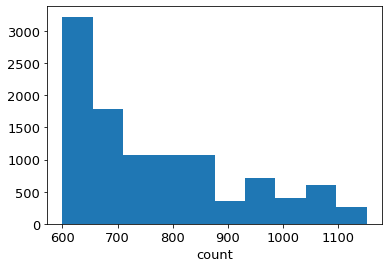

In [61]:
dsE['count'].plot.hist(bins=10)

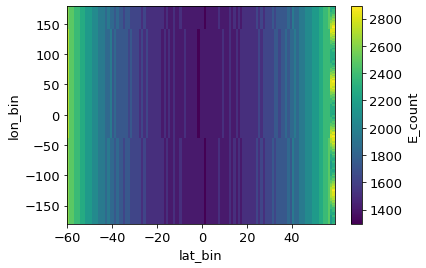

In [59]:
(ds.E_count*(360/40)).plot()